In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
dt=pd.read_csv('result.csv')

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

pp = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [ ]:
comment_list = []
for i in range(len(dt)):
    comment_list.append(dt['댓글 내용'].iloc[i])

In [ ]:
comment_result = []

for i in comment_list:

    i = str(i)

    # 이모지와 특수 문자 제거
    tokens = re.sub(emoji_pattern, "", i)
    tokens = re.sub(pp, "", tokens)

    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

In [ ]:
comment_result

,comment
0,강바오님 정년퇴직 하시더라도 그 후에 동물원 한바퀴 처럼 갖고계신 지식 이렇게 공유...
1,강바오님사육사계의 백종원오은영
2,강철원사육사님이 다른 동물친구들 소개해주셔서 넘 좋아요 역시 푸바오 할부지♡♡
3,우리 강바오님 정말 인품 ️🫶덕분에 뽀미와 레시에 관해서 하나 더 얻어가고 알아가요...
4,강철원 사육사님 아이들 동화책이나 위인전 등의 책 읽어주는 직업도 잘 어울리실거같아요
...,...
84,뽀미처럼 몸쓰면 디스크나 거북목이 안생기겠죠
85,어 푸바오 할부지 왜 여기 계세요
86,강바오할배가 저기 캡틴인가 여기저기에서 다 보이시던데
87,아버지의 부름에 대답하는 자식들이 없음


In [ ]:
import pandas as pd

file_path='/content/drive/MyDrive/Colab Notebooks/comment_result.xlsx'
comment_df = pd.read_excel(file_path)
comment_df.head()

,comment,tokenized
0,강바오님 정년퇴직 하시더라도 그 후에 동물원 한바퀴 처럼 갖고계신 지식 이렇게 공유...,"[101, 8853, 42144, 28188, 108578, 9670, 10954,..."
1,강바오님사육사계의 백종원오은영,"[101, 8853, 42144, 28188, 108578, 12945, 83811..."
2,강철원사육사님이 다른 동물친구들 소개해주셔서 넘 좋아요 역시 푸바오 할부지♡♡,"[101, 8853, 47465, 14279, 12945, 83811, 12945,..."
3,우리 강바오님 정말 인품 ️🫶덕분에 뽀미와 레시에 관해서 하나 더 얻어가고 알아가요...,"[101, 9604, 12692, 8853, 42144, 28188, 108578,..."
4,강철원 사육사님 아이들 동화책이나 위인전 등의 책 읽어주는 직업도 잘 어울리실거같아요,"[101, 8853, 47465, 14279, 9405, 83811, 12945, ..."


In [ ]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

comment_df['comment'] = comment_df['comment'].astype(str)

comment_df = comment_df[comment_df['comment'].str.strip().astype(bool)]

tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
model = AutoModelForSequenceClassification.from_pretrained("klue/bert-base")
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def sentiment_label(sentence):
    if not sentence:
        return None
    result = nlp(sentence)

    # 확률에 따라 라벨링 (예시: 확률이 0.9 미만이면 '평범'으로 간주)
    confidence = result[0]['score']
    if confidence < 0.9:
        return 2
    else:
        return 1 if result[0]['label'] == 'LABEL_1' else 0  #긍정/부정

comment_df['sentiment_label'] = comment_df['comment'].apply(sentiment_label)

print(comment_df)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                              comment  \
0   강바오님 정년퇴직 하시더라도 그 후에 동물원 한바퀴 처럼 갖고계신 지식 이렇게 공유...   
1                                    강바오님사육사계의 백종원오은영   
2         강철원사육사님이 다른 동물친구들 소개해주셔서 넘 좋아요 역시 푸바오 할부지♡♡   
3   우리 강바오님 정말 인품 ️🫶덕분에 뽀미와 레시에 관해서 하나 더 얻어가고 알아가요...   
4    강철원 사육사님 아이들 동화책이나  위인전 등의 책 읽어주는 직업도 잘 어울리실거같아요   
..                                                ...   
84                           뽀미처럼 몸쓰면 디스크나 거북목이 안생기겠죠   
85                                 어 푸바오 할부지 왜 여기 계세요   
86                      강바오할배가 저기 캡틴인가 여기저기에서 다 보이시던데   
87                             아버지의 부름에 대답하는 자식들이 없음    
88                               No English subtitles   

                                            tokenized  sentiment_label  
0   [101, 8853, 42144, 28188, 108578, 9670, 10954,...                2  
1   [101, 8853, 42144, 28188, 108578, 12945, 83811...                2  
2   [101, 8853, 47465, 14279, 12945, 83811, 12945,...                2  
3   [101, 9604, 12692, 

In [ ]:
comment_df.to_csv('comment_df.csv', index=False)

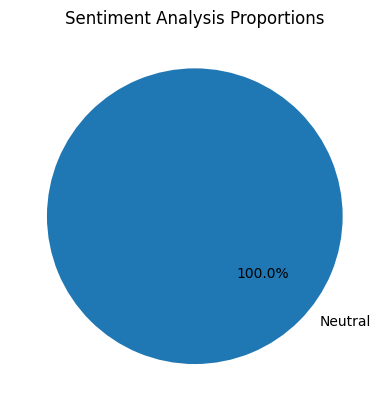

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = comment_df['sentiment_label'].value_counts()

labels = ['Negative', 'Positive', 'Neutral']

pie_labels = [labels[index] for index in sentiment_counts.index]

plt.pie(sentiment_counts, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Proportions')
plt.show()
